# Numerical procedures to solve Partial Differential Equations (PDE)

*Date Posted: 27 March 2024*

## A generic price process $S_t$

Let us say that a general price process can be described as: 

$$dS = a(t,S_t)dt + b(t,S_t)dW_t^\mathbb{Q}$$

where $W^\mathbb{Q}$ is a Brownian motion under the risk neutral probability measure $\mathbb{Q}$.

## Black Scholes PDE
Probably the most famous PDE in finance is the Black Scholes PDE, which descibes the dynamic relationship that the price of a derivative ($F$) needs to satisfy in order for the price to be risk neutral. The equation is expressed as:

$$\frac{\partial F}{\partial t} + \frac{\partial F}{\partial S} a(t,S_t) + \frac{1}{2}\frac{\partial^2 F}{\partial S^2} b^2(t,S_t) = rF$$

### Proof

The main idea behind the proof is that the **discounted price process of our derivative** $\left(\tilde{F}(t,S_t) = e^{-rt}F(t,S_t)\right)$ needs to be a martingale under the risk neutral probability measure $\mathbb{Q}$. If that is the case, that means that (under $\mathbb{Q}$) the drift of the process needs to be zero. 

First we need to express the differential of $\tilde{F}$:

$$
\begin{split}
    d\left(e^{-rt}F\right) &= -re^{-rt}F dt + e^{-rt} dF \\
    &= -re^{-rt}F dt + e^{-rt} \left( \frac{\partial F}{\partial t}dt + \frac{\partial F}{\partial S}dS + \frac{1}{2}\frac{\partial^2 F}{\partial S^2}d\left\langle S,S\right\rangle _t \right) \\
    &= -re^{-rt}F dt + e^{-rt} \left( \frac{\partial F}{\partial t}dt + \frac{\partial F}{\partial S}\left( a(t,S_t)dt + b(t,S_t)dW_t^\mathbb{Q} \right) + \frac{1}{2}\frac{\partial^2 F}{\partial S^2}b^2(t,S_t)dt \right) \\
    &= e^{-rt}\left( -rF + \frac{\partial F}{\partial t} + \frac{\partial F}{\partial S}a(t,S_t) + \frac{1}{2}\frac{\partial^2 F}{\partial S^2}b^2(t,S_t) \right)dt + (\cdots)dW_t^\mathbb{Q}
\end{split}
$$

Here the drift part needs to be zero:

$$-rF + \frac{\partial F}{\partial t} + \frac{\partial F}{\partial S}a(t,S_t) + \frac{1}{2}\frac{\partial^2 F}{\partial S^2}b^2(t,S_t) = 0$$

which gives us the BS PDE from above.

## Implementation
### Choosing the payoff to price

For this exercise we chose the condor strategy that is a combination of **four call options** with the same maturity and with strike prices $K_1<K_2<K_3<K_4$:

- **Long** call with strike $K_1$
- **Short** call with strike $K_2$
- **Short** call with strike $K_3$
- **Long** call with strike $K_4$

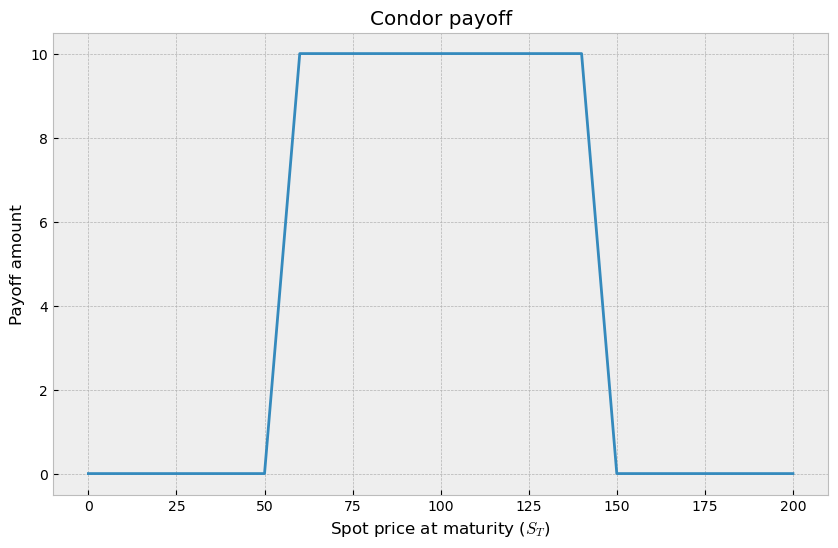

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib import cbook
import matplotlib
plt.style.use('bmh')

# Payoff at maturity of the condor strategy
def condor_payoff(s, k1, k2, k3, k4):
    payoff = np.maximum(0, s-k1) - np.maximum(0, s-k2) - np.maximum(0,s-k3) + np.maximum(0,s-k4)
    return payoff

# Strike prices
k1 = 50
k2 = 60
k3 = 140
k4 = 150

x = np.linspace(0, 200, 301)
y = condor_payoff(x, k1, k2, k3, k4)

plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title('Condor payoff')
plt.xlabel('Spot price at maturity ($S_T$)')
plt.ylabel('Payoff amount')
plt.show()

In [2]:
S0 = 100
T = 1

S_max = 2*S0

nt = 50
ns = 100

dt = T/nt
ds = S_max/ns

grid = np.zeros(shape=(nt+1,ns+1))

# left boundary
grid[:,0] = 0

# right boundary
grid[:,-1] = 0

# bottom boundary
S_T = np.array(range(0,ns+1)) * (S_max / ns)
grid[-1,:] = condor_payoff(S_T, k1, k2, k3, k4)

### Constructing the grid

When working with PDEs we need to work on a grid of possible values of $t$ and $S$ (see picture below). When we need to implement that in Python, the easiest way to represent it is by using a matrix. The values of time $t$ will be in the interval $t\in[0,T]$, where $T$ is the time of maturity of the contract, and the values of the underlying $S$ will be in the in the interval $[0,S_{max}]$, where we are free to choose $S_{max}$, but normally it is sufficient to choose $S_{max} = S_0$, where $S_0$ is the current price of the underlying.

Other things that we need to choose are the number of steps that we are going to divide each dimension by:

- $n_t$ the number of steps for time
- $n_S$ the number of steps for the underlying

when we decide that, we know the size of each step for time and for the underlying, i.e.:

$$\Delta t = \frac{T}{n_t} \hspace{0.2cm}\text{ and } \hspace{0.2cm}\Delta S = \frac{S_{max}}{n_S}$$

Then each possible value of time on our grid is represented by $t_i = i\Delta t$, where $i=0,...,n_t$. Analogously, for the underlying we have $S_j = j\Delta S$, where $j=0,...,n_S$.

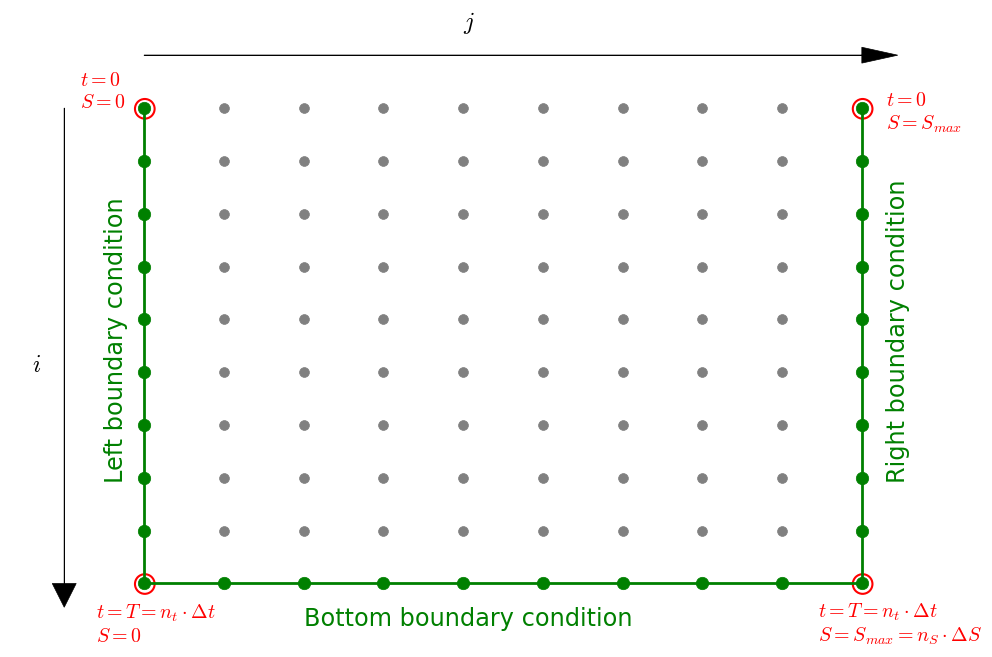

In [3]:
plt.figure(figsize=(12,8))
n = 10
for i in range(n):
    for j in range(n):
        is_boundary = (i == 0 or j == 0 or i == n-1)
        color = 'green' if is_boundary else 'gray'
        size = 80 if is_boundary else 50
        plt.scatter(i,j,c=color, s=size, alpha=1)

plt.arrow(0,10, 9, 0, color='black', head_width=0.3)        
plt.arrow(-1,9, 0, -9, color='black', head_width=0.3)        
plt.text(4, 10.5, '$j$', fontsize='xx-large')
plt.text(-1.4, 4, '$i$', fontsize='xx-large')
plt.gca().set_facecolor('white')
plt.gca().grid(False)
plt.gca().axis(False)
plt.text(-0.5, 2, 'Left boundary condition', fontsize='xx-large', rotation='vertical', c='green')
plt.text(2, -0.8, 'Bottom boundary condition', fontsize='xx-large', rotation='horizontal', c='green')
plt.text(9.3, 2, 'Right boundary condition', fontsize='xx-large', rotation='vertical', c='green')

plt.scatter(0.01,8.985,c='none', s=200, alpha=1, edgecolors='r', lw=1.5)
plt.scatter(9.01,8.985,c='none', s=200, alpha=1, edgecolors='r', lw=1.5)
plt.scatter(0.01,-0.01,c='none', s=200, alpha=1, edgecolors='r', lw=1.5)
plt.scatter(9.01,-0.01,c='none', s=200, alpha=1, edgecolors='r', lw=1.5)

plt.text(-0.8,9.0, '$t=0$\n$S=0$', fontsize='x-large', rotation='horizontal', c='red')
plt.text(9.3,8.6, '$t=0$\n$S=S_{max}$', fontsize='x-large', rotation='horizontal', c='red')
plt.text(-0.6,-1.1, '$t=T=n_t\\cdot \\Delta t$\n$S=0$', fontsize='x-large', rotation='horizontal', c='red')
plt.text(8.45,-1.1, '$t=T=n_t\\cdot \\Delta t$\n$S=S_{max}=n_S\\cdot \\Delta S$', fontsize='x-large', rotation='horizontal', c='red')

plt.plot([0,0], [0,n-1], c='green', lw=2)
plt.plot([0,n-1], [0,0], c='green', lw=2)
plt.plot([n-1,n-1], [0,n-1], c='green', lw=2)

plt.show()

### Choosing the process governing the underlying $S$

Now we have to assume a certain process of the underlying stock price. For simplicity and to be able to copmare the result with the one obtained by the closed-form Black-Scholes formula, here we choose the **geometric Brownian motion**. 

```{note}
Keep in mind that the solution provided below works for any process as long as it is represetable as:

$$dS = a(t,S_t)dt + b(t,S_t)dW_t^\mathbb{Q}$$
```

The GBM under the risk-neutral measure $\mathbb{Q}$ is given by:

$$dS = S(r-q) dt + S\sigma dW_t^\mathbb{Q}$$

So we can simply read the functions $a(t,S_t)$ and $b(t,S_t)$.

$$
\begin{split}
    a(t,S_t) &= S(r-q) \\
    b(t,S_t) &= S\sigma
\end{split}
$$

Or in terms of our discrete grid:

$$
\begin{split}
    a(t,S_t) &= \left(j\cdot \Delta S\right) (r-q) \\
    b(t,S_t) &= \left(j\cdot \Delta S\right)\sigma
\end{split}
$$

In [4]:
r = 0.04
q = 0
sigma = 0.35

def a(t,s):
    return s*(r-q)

def b(t,s):
    return s*sigma

### Partial derivatives estimation

Each point at the grid is $F(t,S)$, but $t$ and $S$ are the multiples of $\Delta t$ and $\Delta S$ that we choose when discretizing the grid:

$$
\begin{split}
    t_i = i\cdot\Delta t \\
    S_j = j\cdot\Delta S
\end{split}
$$

This means that we can write $F(t_i,S_j)$ as $$F(t_i,S_j) = F(i\Delta t, j\Delta S) \equiv f_{i,j}$$

where we choose to denote it with $f_{i,j}$ for convenience.

We know that any derivative, which has $S_t$ as an underlying, has to satisfy the differential equation from above, i.e.

$$\frac{\partial F}{\partial t} + \frac{\partial F}{\partial S}a(t,S_t) + \frac{1}{2}\frac{\partial^2 F}{\partial S^2}b^2(t,S_t) = rF$$

We discretized the domain of $(t,S)$ with a grid and now the first question may be how will we use that to solve the PDE. Well we need to define how we will proxy the partial derivatives from the equation. When it comes to partial derivative w.r.t. $S$, we will use the **central difference estimate**. That is, if we want to evaulate these partial derivatives in the node $F(t_i,S_j)$ , then we will use:

$$
\begin{split}
    \frac{\partial F}{\partial S} &\approx \frac{F(t_i,S_j+\Delta S) - F(t_i,S_j-\Delta S)}{2\Delta S} = \frac{F(t_i,(j+1)\Delta S) - F(t_i,(j-1)\Delta S)}{2\Delta S} = \frac{f_{i,j+1} - f_{i,j-1}}{2\Delta S} \\
    \frac{\partial^2 F}{\partial S^2} &\approx \frac{F(t_i,S_j+\Delta S) - 2F(t_i,S_j) + F(t_i,S_j-\Delta S)}{} =\frac{f_{i,j+1} - 2f_{i,j} + f_{i,j-1}}{2\Delta S}
\end{split}
$$

The choice of our estimator for $\frac{\partial F}{\partial t}$ will be crucial when it comes to stability of the solution. We have two choices: 

$$
\begin{split}
    \frac{\partial F}{\partial t} \approx \frac{F(t_i,S_j) - F(t_i-\Delta t, S_j)}{\Delta t} = \frac{f_{i,j} - f_{i-1,j}}{\Delta t} \hspace{0.5cm} \text{(backward difference estimator)}\\
    \frac{\partial F}{\partial t} \approx \frac{F(t_i+\Delta t,S_j) - F(t_i, S_j)}{\Delta t} = \frac{f_{i+1,j} - f_{i,j}}{\Delta t} \hspace{0.5cm} \text{(forward difference estimator)}\\
\end{split}
$$

```{important}
Notice that that these are forward/backward/central estimators **with respect to the node** $f_{i,j}$
```

By choosing the **backward difference estimator** we will have a simpler solution, because three bottom nodes determine the value of one node above:

![explicit](imgs/explicit.svg)

The downside of this method is that it is not stable, and increasing number of steps $n_t$ of $n_S$ (i.e. decreasing the $\Delta t$ and $\Delta S$) the numbers could *explode* and we would not get the correct solution. 

However, if we choose the **forward difference estimator**, the solution requires us to solve the whole row at once and it is slightly more demanding to derive the system of equations, but it is a very stable solution and it does not suffer from the same problem as above. The reason why it is more challenging is because one node from below determines the value of three nodes above:

![implicit](imgs/implicit.svg)

We will go in the course of the latter, we will work out the math, even though it is a bit more challenging, but that will allow us to have a stable solution 🙃

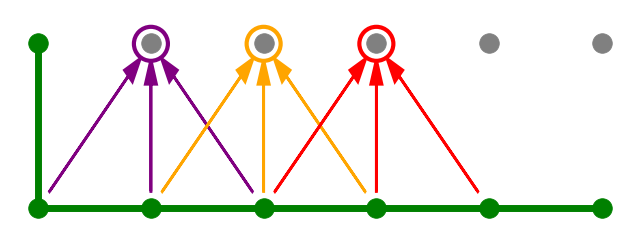

In [5]:
plt.figure(figsize=(8,3))
size = 200
plt.scatter(0, 0,c='green', s=size, alpha=1)
plt.scatter(1, 0,c='green', s=size, alpha=1)
plt.scatter(2, 0,c='green', s=size, alpha=1)
plt.scatter(3, 0,c='green', s=size, alpha=1)
plt.scatter(4, 0,c='green', s=size, alpha=1)
plt.scatter(5, 0,c='green', s=size, alpha=1)

plt.scatter(0, 1,c='green', s=size, alpha=1)
plt.scatter(1, 1,c='gray', s=size, alpha=1); plt.scatter(1, 0.995,c='none', s=size*3, alpha=1, edgecolor='purple', lw=3)
plt.scatter(2, 1,c='gray', s=size, alpha=1); plt.scatter(2, 0.995,c='none', s=size*3, alpha=1, edgecolor='orange', lw=3)
plt.scatter(3, 1,c='gray', s=size, alpha=1); plt.scatter(3, 0.995,c='none', s=size*3, alpha=1, edgecolor='red', lw=3)
plt.scatter(4, 1,c='gray', s=size, alpha=1)
plt.scatter(5, 1,c='gray', s=size, alpha=1)

plt.plot([0,0], [0,1], c='green', lw=5)
plt.plot([0,5], [0,0], c='green', lw=5)

plt.arrow(0.1,0.1, 0.7, 0.7, color='purple', head_width=0.1, lw=2)
plt.arrow(1,0.1, 0, 0.65, color='purple', head_width=0.1, lw=2)
plt.arrow(1.9,0.1, -0.7, 0.7, color='purple', head_width=0.1, lw=2)

plt.arrow(1.1,0.1, 0.7, 0.7, color='orange', head_width=0.1, lw=2)
plt.arrow(2,0.1, 0, 0.65, color='orange', head_width=0.1, lw=2)
plt.arrow(2.9,0.1, -0.7, 0.7, color='orange', head_width=0.1, lw=2)

plt.arrow(2.1,0.1, 0.7, 0.7, color='red', head_width=0.1, lw=2)
plt.arrow(3,0.1, 0, 0.65, color='red', head_width=0.1, lw=2)
plt.arrow(3.9,0.1, -0.7, 0.7, color='red', head_width=0.1, lw=2)

plt.gca().set_facecolor('white')
plt.gca().grid(False)
plt.gca().axis(False)
plt.gca().set_ylim((-0.2,1.2))
plt.savefig('imgs/explicit.svg')
plt.show()

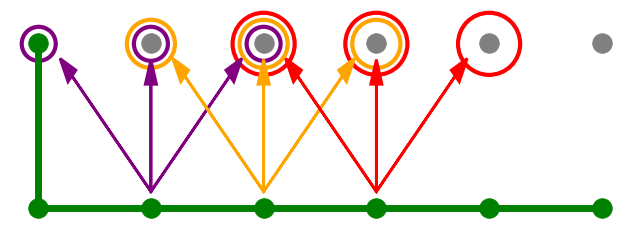

In [6]:
plt.figure(figsize=(8,3))
size = 200
plt.scatter(0, 0,c='green', s=size, alpha=1)
plt.scatter(1, 0,c='green', s=size, alpha=1)
plt.scatter(2, 0,c='green', s=size, alpha=1)
plt.scatter(3, 0,c='green', s=size, alpha=1)
plt.scatter(4, 0,c='green', s=size, alpha=1)
plt.scatter(5, 0,c='green', s=size, alpha=1)

plt.scatter(0, 1,c='green', s=size, alpha=1); plt.scatter(0.005, 0.995,c='none', s=size*3, alpha=1, edgecolor='purple', lw=3)
plt.scatter(1, 1,c='gray', s=size, alpha=1); plt.scatter(1, 0.995,c='none', s=size*3, alpha=1, edgecolor='purple', lw=3); plt.scatter(1, 0.995,c='none', s=size*6, alpha=1, edgecolor='orange', lw=3)
plt.scatter(2, 1,c='gray', s=size, alpha=1); plt.scatter(2, 0.995,c='none', s=size*3, alpha=1, edgecolor='purple', lw=3); plt.scatter(2, 0.995,c='none', s=size*6, alpha=1, edgecolor='orange', lw=3); plt.scatter(2, 0.995,c='none', s=size*10, alpha=1, edgecolor='red', lw=3)
plt.scatter(3, 1,c='gray', s=size, alpha=1); plt.scatter(3, 0.995,c='none', s=size*6, alpha=1, edgecolor='orange', lw=3); plt.scatter(3, 0.995,c='none', s=size*10, alpha=1, edgecolor='red', lw=3)
plt.scatter(4, 1,c='gray', s=size, alpha=1); plt.scatter(4, 0.995,c='none', s=size*10, alpha=1, edgecolor='red', lw=3)
plt.scatter(5, 1,c='gray', s=size, alpha=1)

plt.plot([0,0], [0,1], c='green', lw=5)
plt.plot([0,5], [0,0], c='green', lw=5)

plt.arrow(1,0.1, -0.7, 0.7, color='purple', head_width=0.1, lw=2)
plt.arrow(1,0.1, 0, 0.65, color='purple', head_width=0.1, lw=2)
plt.arrow(1,0.1, 0.7, 0.7, color='purple', head_width=0.1, lw=2)

plt.arrow(2,0.1, -0.7, 0.7, color='orange', head_width=0.1, lw=2)
plt.arrow(2,0.1, 0, 0.65, color='orange', head_width=0.1, lw=2)
plt.arrow(2,0.1, 0.7, 0.7, color='orange', head_width=0.1, lw=2)

plt.arrow(3,0.1, -0.7, 0.7, color='red', head_width=0.1, lw=2)
plt.arrow(3,0.1, 0, 0.65, color='red', head_width=0.1, lw=2)
plt.arrow(3,0.1, 0.7, 0.7, color='red', head_width=0.1, lw=2)

plt.gca().set_facecolor('white')
plt.gca().grid(False)
plt.gca().axis(False)
plt.gca().set_ylim((-0.2,1.2))
plt.savefig('imgs/implicit.svg')
plt.show()

### Constructing the system of equations

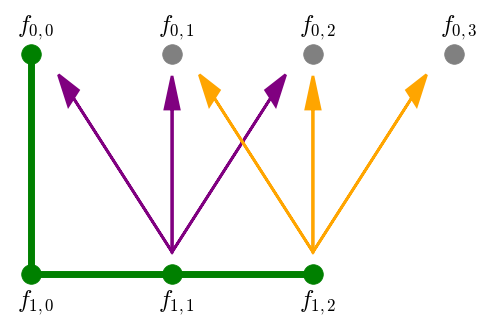

In [7]:
plt.figure(figsize=(6,4))
size = 200
plt.scatter(0, 0,c='green', s=size, alpha=1)
plt.scatter(1, 0,c='green', s=size, alpha=1)
plt.scatter(2, 0,c='green', s=size, alpha=1)

plt.scatter(0, 1,c='green', s=size, alpha=1)
plt.scatter(1, 1,c='gray', s=size, alpha=1)
plt.scatter(2, 1,c='gray', s=size, alpha=1)
plt.scatter(3, 1,c='gray', s=size, alpha=1)

plt.plot([0,0], [0,1], c='green', lw=5)
plt.plot([0,2], [0,0], c='green', lw=5)

plt.arrow(1,0.1, -0.7, 0.7, color='purple', head_width=0.1, lw=2)
plt.arrow(1,0.1, 0, 0.65, color='purple', head_width=0.1, lw=2)
plt.arrow(1,0.1, 0.7, 0.7, color='purple', head_width=0.1, lw=2)

plt.arrow(2,0.1, -0.7, 0.7, color='orange', head_width=0.1, lw=2)
plt.arrow(2,0.1, 0, 0.65, color='orange', head_width=0.1, lw=2)
plt.arrow(2,0.1, 0.7, 0.7, color='orange', head_width=0.1, lw=2)

plt.text(-0.1, 1.1, '$f_{0,0}$', fontsize='xx-large')
plt.text(0.9, 1.1, '$f_{0,1}$', fontsize='xx-large')
plt.text(1.9, 1.1, '$f_{0,2}$', fontsize='xx-large')
plt.text(2.9, 1.1, '$f_{0,3}$', fontsize='xx-large')

plt.text(-0.1, -0.15, '$f_{1,0}$', fontsize='xx-large')
plt.text(0.9, -0.15, '$f_{1,1}$', fontsize='xx-large')
plt.text(1.9, -0.15, '$f_{1,2}$', fontsize='xx-large')

plt.gca().set_facecolor('white')
plt.gca().grid(False)
plt.gca().axis(False)
plt.gca().set_ylim((-0.2,1.2))
plt.show()

#### Single node equation
The PDE from above has to hold across the whole grid of course: 

$$\frac{\partial F}{\partial t} + \frac{\partial F}{\partial S}a(t,S_t) + \frac{1}{2}\frac{\partial^2 F}{\partial S^2}b^2(t,S_t) = rF$$

To write it in terms of purple arrows or orange arrows we need to know which node we are at at the moment. Since the green nodes are boundary conditions and they are known, we loop over the first rown from below that is still unknown. So we start with the node $f_{0,1}$, then $f_{0,2}$ etc.

When we talk about the **purple** arrows, the node that we are at is the node $f_{0,1}$:

$$
\begin{gathered}
\frac{f_{1,1}-f_{0,1}}{\Delta t} + \frac{f_{0,2}-f_{0,0}}{2\Delta S}a(0\cdot \Delta t,1\cdot\Delta S) + \frac{1}{2}\frac{f_{0,2}-2f_{0,1}+f_{0,0}}{\left( \Delta S \right)^2}b^2(0\cdot \Delta t,1\cdot\Delta S) = rf_{0,1} \\
\frac{f_{1,1}-f_{0,1}}{\Delta t} + \frac{f_{0,2}-f_{0,0}}{2\Delta S}a_{0,1} + \frac{1}{2}\frac{f_{0,2}-2f_{0,1}+f_{0,0}}{\left( \Delta S \right)^2}b^2_{0,1} = rf_{0,1} \\
\end{gathered}
$$

where $a_{i,j} = a(i\cdot \Delta t, j\cdot \Delta S)$ and $b_{i,j} = b(i\cdot \Delta t, j\cdot \Delta S)$.

When we want to write an equation for the **orange** arrows, our main node is $f_{0,2}$ and we have:

$$
\begin{gathered}
\frac{f_{1,2}-f_{0,2}}{\Delta t} + \frac{f_{0,3}-f_{0,1}}{2\Delta S}a_{0,2} + \frac{1}{2}\frac{f_{0,3}-2f_{0,2}+f_{0,1}}{\left( \Delta S \right)^2}b^2_{0,2} = rf_{0,2} \\
\end{gathered}
$$

This can be generalized for every node:

$$
\frac{f_{i+1,j}-f_{i,j}}{\Delta t} + \frac{f_{i,j+1}-f_{i,j-1}}{2\Delta S}a_{i,j} + \frac{1}{2}\frac{f_{i,j+1}-2f_{i,j}+f_{i,j-1}}{\left( \Delta S \right)^2}b^2_{i,j} = rf_{i,j} \\
$$

If we rearange the first equation such that we have unknowns on the left side and know values on the right side, we get:

$$
\begin{gathered}
f_{i,j-1}\left( -\frac{a_{i,j}}{2\Delta S} + \frac{b_{i,j}^2}{2(\Delta S)^2} \right) 
+ f_{i,j}\left(-\frac{1}{\Delta t} - \frac{b_{i,j}^2}{(\Delta S)^2} - r\right) 
+ f_{i,j+1}\left( \frac{a_{i,j}}{2\Delta S} + \frac{b_{i,j}^2}{2(\Delta S)^2}\right)
= -\frac{f_{i+1,j}}{\Delta t} \\
f_{i,j-1}\alpha_{i,j}
+ f_{i,j}\beta_{i,j}
+ f_{i,j+1}\gamma_{i,j}
= -\frac{f_{i+1,j}}{\Delta t}
\end{gathered}
$$

where with $\alpha, \beta \text{ and } \gamma$ we denote:

$$
\begin{split}
    \alpha_{i,j} &=  -\frac{a_{i,j}}{2\Delta S} + \frac{b_{i,j}^2}{2(\Delta S)^2}  \\
    \beta_{i,j} &= -\frac{1}{\Delta t} - \frac{b_{i,j}^2}{(\Delta S)^2} - r \\
    \gamma_{i,j} &=  \frac{a_{i,j}}{2\Delta S} + \frac{b_{i,j}^2}{2(\Delta S)^2}
\end{split}
$$

#### Equation for the whole row

When it comes to the **purple** arrows, we have the following equation:

$$
\begin{gathered}
f_{0,0}\alpha_{0,1}
+ f_{0,1}\beta_{0,1}
+ f_{0,2}\gamma_{0,1}
= -\frac{f_{1,1}}{\Delta t} \\
\end{gathered}
$$

And for the **orange** arrows:

$$
\begin{gathered}
f_{0,1}\alpha_{0,2}
+ f_{0,2}\beta_{0,2}
+ f_{0,3}\gamma_{0,2}
= -\frac{f_{1,2}}{\Delta t} \\
\end{gathered}
$$

These two equations can be written in a matrix form:

$$
\begin{bmatrix}
    \alpha_{0,1} & \beta_{0,1} & \gamma_{0,1} & 0 \\
    0 & \alpha_{0,2} & \beta_{0,2} & \gamma_{0,2} \\
\end{bmatrix}
\begin{bmatrix}
    f_{0,0} \\ f_{0,1} \\ f_{0,2} \\ f_{0,3}
\end{bmatrix}
= 
\begin{bmatrix}
   -\frac{f_{1,1}}{\Delta t} \\ -\frac{f_{1,2}}{\Delta t}
\end{bmatrix}
$$

This can of course be written to capture all nodes, and not just the first two nodes:

$$
\begin{bmatrix}
    \alpha_{0,1} & \beta_{0,1} & \gamma_{0,1} & 0 & 0 & 0 & \cdots & 0 \\
    0 & \alpha_{0,2} & \beta_{0,2} & \gamma_{0,2} & 0 & 0 & \cdots & 0 \\
    \vdots & & & & \vdots & & & \vdots \\
    0 & 0 & \cdots & & 0 & \alpha_{0,m-1} & \beta_{0,m-1} & \gamma_{0,m-1}
\end{bmatrix}
\begin{bmatrix}
    f_{0,0} \\ f_{0,1} \\ \vdots \\ f_{0,m}
\end{bmatrix}
= 
\begin{bmatrix}
   -\frac{f_{1,1}}{\Delta t} \\ -\frac{f_{1,2}}{\Delta t} \\ \vdots \\ -\frac{f_{1,m-1}}{\Delta t}
\end{bmatrix}
$$

but the values $f_{0,0}$ and $f_{0,m}$ are known, because they are left and right boundary conditions for time $t=0$, so we need to get rid of these known values to get a square matrix on the left:

$$
\begin{bmatrix}
    \beta_{0,1} & \gamma_{0,1} & 0 & 0 & 0 &\cdots & 0\\
    \alpha_{0,2} & \beta_{0,2} & \gamma_{0,2} & 0 & 0 & \cdots & 0 \\
    0 & \alpha_{0,3} & \beta_{0,3} & \gamma_{0,3} & 0 & \cdots & 0 \\
    \vdots & & & \ddots & & & \vdots \\
    0 & \cdots & & 0 & \alpha_{0,m-2} & \beta_{0,m-2} & \gamma_{0,m-2} \\
    0 & \cdots & & & 0 & \alpha_{0,m-1} & \beta_{0,m-1} \\
\end{bmatrix}
\begin{bmatrix}
    f_{0,1} \\ f_{0,2} \\ f_{0,3} \\ \vdots \\ f_{0,m-2} \\ f_{0,m-1}
\end{bmatrix}
= 
\begin{bmatrix}
   -\frac{f_{1,1}}{\Delta t} - \alpha_{0,1}\cdot f_{0,0} \\ -\frac{f_{1,2}}{\Delta t} \\ -\frac{f_{1,3}}{\Delta t} \\ \vdots \\ -\frac{f_{1,m-2}}{\Delta t} \\ -\frac{f_{1,m-1}}{\Delta t} - \gamma_{0,m-1}f_{0,m}
\end{bmatrix}
$$

Where $m=n_S=\frac{S_{max}}{\Delta S}$ is the number of steps in the value of $S$ in the grid. Essentially, what we did here was to remove the first and the last column from the matrix and moved the constant to the right side of their respective equations.

If we write down this equation compactly we get:

$$M\cdot \underline{\vartheta} = \underline{d}$$

it means that we can obtain the solution for the whole row with:

$$\underline{\vartheta} = M^{-1}\cdot\underline{d}$$

```{note}
Now we have shown how to obtain the solution for the whole row of the grid. We must repeat this action until we fill the whole grid. Notice that it is only important that the row below the one that we are trying to solve is solved (or is a boundary condition which is the case for the first step of the algorithm).
```

Let us now have a look at the implementation 😊

In [8]:
for i in range(nt-1, -1, -1):
    M = np.zeros(shape=(ns-1,ns+1))

    # fill the matrix M
    for j in range(1, ns):
        alpha = -a(i*dt,j*ds)/(2*ds) + (b(i*dt,j*ds)**2)/(2*ds**2)
        beta = -1/dt - (b(i*dt,j*ds)**2)/(ds**2) - r
        gamma = a(i*dt,j*ds)/(2*ds) + (b(i*dt,j*ds)**2)/(2*ds**2)
        coefs = np.array([alpha,beta,gamma])
        M[j-1,j-1:j-1+3] = coefs
    
    # Initialize vector d and move the constants on the right side of the equation
    d = -grid[i+1,1:-1]/dt
    for j in range(len(M)):
        d[j] += -M[j,0]*grid[i,0] - M[j,-1]*grid[i,-1]
    
    # Remove the first and last column from the matrix
    M = M[:,1:-1]
    
    # Solve the system and update the grid with the values we obtained
    prices = np.linalg.solve(M,d)
    grid[i,1:-1] = prices

## Results

Since we were working on a grid, and for each pair of $(t_i, S_j)$ we have determined the price $f_{i,j}$ of our contract, we can represent the result as a 3-dimensional surface:

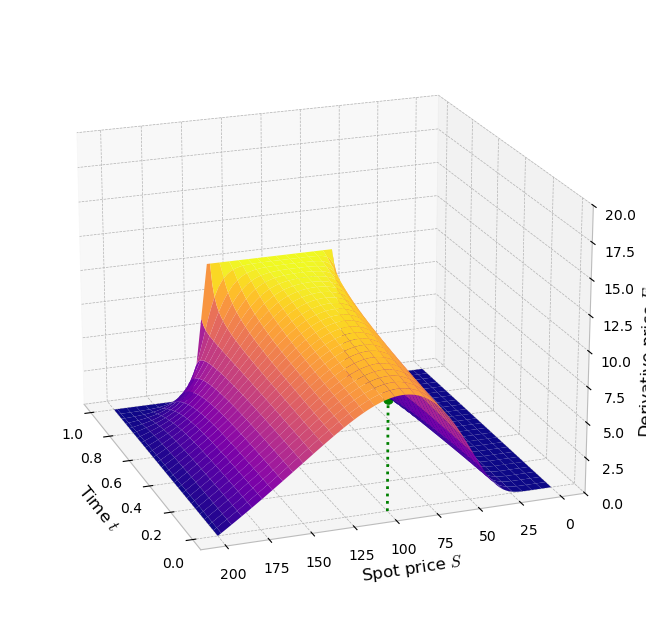

In [9]:
fig = plt.figure(figsize=(8,8))

ax = plt.axes(projection='3d')
ax.azim = 160
ax.elev = 20

t_axis = np.array(range(0,nt+1))*dt
s_axis = np.array(range(0,ns+1))*ds

t_axis, s_axis = np.meshgrid(t_axis, s_axis)

ax.plot_surface(t_axis, s_axis, grid.T, cmap='plasma')
ax.scatter(0, S0, grid[0,int(S0/ds)], c='green', s=50)
ax.plot([0,0], [S0,S0], [0,grid[0,int(S0/ds)]], c='green', linestyle=':', lw=2)
ax.set_xlabel('Time $t$')
ax.set_ylabel('Spot price $S$')
ax.set_zlabel('Derivative price $F$')

ax.set_zlim((0, 20))
plt.gca().set_facecolor('white')
plt.show()

In order to read the current price of the contract, i.e. the price for $(t=0,S_0)$ we need to read it by choosing the correct point on the grid:

In [10]:
print(f'Current price of the derivative is: {grid[0,int(S0/ds)]}')

Current price of the derivative is: 7.847763609439438


```{note}
The price obtained by using Black and Scholes formula for 4 call options was:

$$P = 7.8535$$

which is very close to the price obtained by using the numerical method to solve the PDE.
```

In [11]:
from scipy.stats import norm

def bs_formula(S, K, r, q, sigma, T, option='call'):
    d1, d2, nd1, nd2, price = np.nan, np.nan, np.nan, np.nan, np.nan
    
    if T > 0:
        d1 = (np.log(S/K) + (r - q + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        nd1 = norm(loc = 0 , scale = 1).cdf(d1)
        nd2 = norm(loc = 0 , scale = 1).cdf(d2)

        if option == 'call':
            price = S*np.e**(-q*T)*nd1 - K * np.e**(-r*T) * nd2
        elif option == 'put':
            price = K * np.e**(-r*T) * (1-nd2) - S*np.e**(-q*T)*(1-nd1)

    return price

In [12]:
# Check using BS formula
p1 = bs_formula(100, k1, r, q, sigma, T, option='call')
p2 = bs_formula(100, k2, r, q, sigma, T, option='call')
p3 = bs_formula(100, k3, r, q, sigma, T, option='call')
p4 = bs_formula(100, k4, r, q, sigma, T, option='call')
print(p1 - p2 - p3 + p4)

7.853517599253028


Let us also have a look at the shape of the price for all times $t$, that is, what happens if we *cut* the surface above at each time $t\in[0,T=1]$. The color bar shows the **white line** corresponds to time $t=0$, while the **dark blue line** corresponds to time $t=T=1$. The lighter blue lines correspond to all times inbetween, where the level of *blueness* is determined by how close we are to the time of maturity $T$.

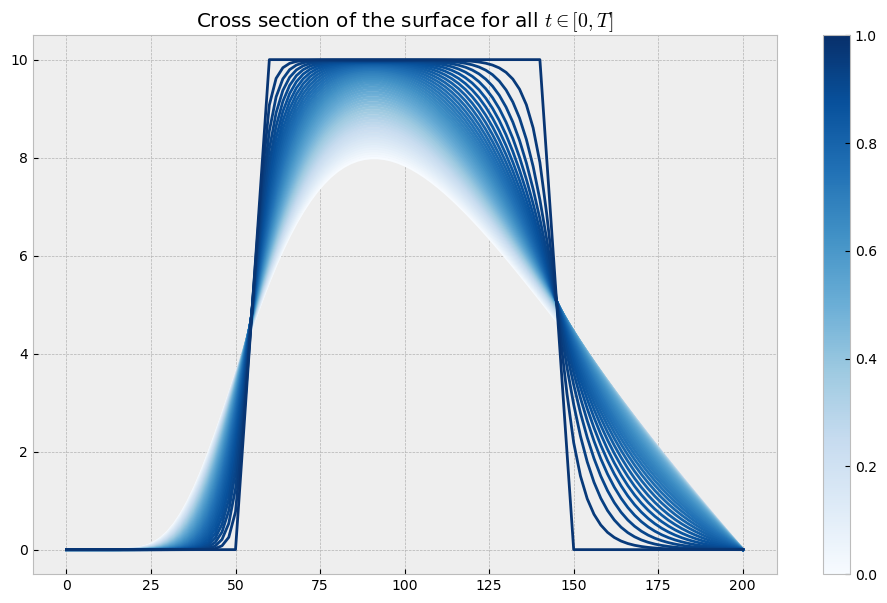

In [13]:
cmap = plt.get_cmap('Blues')
fig = plt.figure(figsize=(12,7))

steps = grid.shape[0]
S_range = np.linspace(0, S_max, len(grid[0]))

for i in range(steps):
    plt.plot(S_range, grid[i], c=cmap(i/steps))
    
# Color bar setup
normalize = mcolors.Normalize(vmin=0, vmax=T)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmap)
scalarmappaple.set_array(np.linspace(0,T,steps))
plt.colorbar(scalarmappaple, ax=plt.gca())

plt.title('Cross section of the surface for all $t\\in[0,T]$')
plt.show()

## Conclusion

PDE are a very powerful way to price the derivative products. Not only it is fast, but it is also stable (the solution that we showed here). The downside of this method is that it is difficult to generalize for path-dependent derivatives and if a different method is used to populate the grid the solution may become unstable.

## References

- Personal Notes
- Bocconi Lectures on Computational Methods in Finance